## GROUP 4
- Lorenza Di Mauro
- Raffaele Sannino
- Maria Raffaella Zampella

In [ ]:
!pip install av

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# PyTorch - torchvision.utils
The *torchvision.utils* module contains various utilities, mostly for visualization (see https://pytorch.org/vision/stable/utils.html#utils).

It is composed by only 6 methods:
- ##### *draw_bounding_boxes(images, boxes[, labels,...])*;
- ##### *draw_segmentation_masks(image, masks[,...])*;
- ##### *draw keypoints(image, keypoints[,...])*;
- ##### *flow_to_image(flow)*;
- ##### *make_grid(tensor[,nrow, padding,...])*;
- ##### *save_image(tensor, fp[, format])*;

So let's going in the details of everyone of these functions.

In [ ]:
!pip install torchvision
import torch
import torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### DRAW_BOUNDING_BOXES
One of the classic problems in the Computer Vision field is the object recognition. In these kind of tasks it is useful to implement a bounding box each for all the interested objects. 

<figure>
<center>
<img src='https://pytorch.org/vision/stable/_images/sphx_glr_plot_visualization_utils_002.png' />
<figcaption>Draw_bounding_boxes example</figcaption></center>
</figure>



The values of the input image should be uint8 between 0 and 255. If fill is True, Resulting Tensor should be saved as PNG image.

The parameters are:

- **image** (Tensor) – Tensor of shape (C x H x W) and dtype uint8.

- **boxes** (Tensor) – Tensor of size (N, 4) containing bounding boxes in (xmin, ymin, xmax, ymax) format. Note that the boxes are absolute coordinates with respect to the image. In other words: 0 <= xmin < xmax < W and 0 <= ymin < ymax < H.

- **labels** (List[str]) – List containing the labels of bounding boxes.

- **colors** (color or list of colors, optional) – List containing the colors of the boxes or single color for all boxes. The color can be represented as PIL strings e.g. “red” or “#FF00FF”, or as RGB tuples e.g. (240, 10, 157). By default, random colors are generated for boxes.

- **fill** (bool) – If True fills the bounding box with specified color.

- **width** (int) – Width of bounding box.

- **font** (str) – A filename containing a TrueType font. If the file is not found in this filename, the loader may also search in other directories, such as the fonts/ directory on Windows or /Library/Fonts/, /System/Library/Fonts/ and ~/Library/Fonts/ on macOS.

- **font_size** (int) – The requested font size in points

This returns **Image Tensor of dtype uint8** with bounding boxes plotted.

Now we're going to see an application example found on https://www.geeksforgeeks.org/how-to-draw-bounding-boxes-on-an-image-in-pytorch/

<class 'torch.Tensor'>


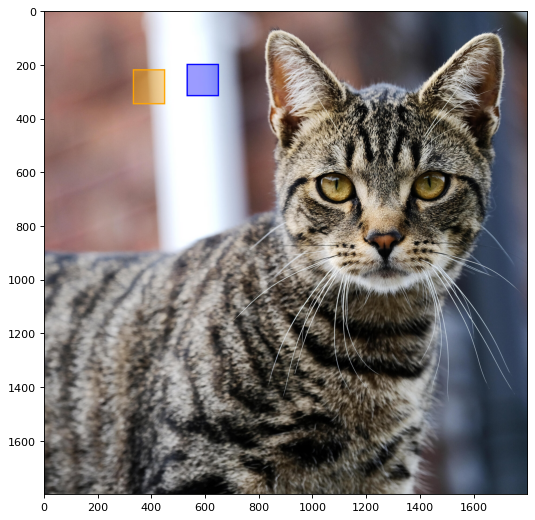

In [ ]:
# Import the required libraries
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
import matplotlib.pyplot as plt #this because on colab img.show() doesn't work

# read input image from your computer
img = read_image('/content/cat.jpg')  #returns a torch tensor

# create boxes
box_1 = [330, 220, 450, 350]  # "coordinates" of the box 1 (xmin, ymin, xmax, ymax)
box_2 = [530, 200, 650, 320]  # "coordinates" of the box 2
box = [box_1, box_2]          # note that the two previous boxes are incapsulated in one list that is recalled in the draw_bounding_boxes function (after being transformed in a pytorch tensor)
box = torch.tensor(box, dtype=torch.int)

# draw bounding box and fill color
img = draw_bounding_boxes(img, box, width=5, colors=["orange", "blue"], fill=True)
print(type(img))

# transform this image to PIL image
img = torchvision.transforms.ToPILImage()(img)

# display output
plt.figure(figsize=(8, 8), dpi=80)
plt.imshow(img)

### DRAW_SEGMENTATION_MASKS
Before discussing this function it is useful to make some clarifications about the *masks*: In tasks like instance and panoptic segmentation, masks are commonly defined, and are defined by this package, as a multi-dimensional array (e.g. a NumPy array or a PyTorch tensor) with the following shape:

#### (num_objects, height, width)

Where **num_objects** is the number of annotated objects in the image. Each (height, width) object corresponds to exactly one object. For example, if your input image has the dimensions 224 x 224 and has four annotated objects the shape of your masks annotation has the following shape:

### (4, 224, 224).

A nice property of masks is that they can be easily repurposed to be used in methods to solve a variety of object localization tasks.

In [ ]:
import numpy as np
import torchvision.transforms.functional as F

plt.rcParams["savefig.bbox"] = 'tight'  #allows you to change some parameters of pyplot: in this case the thickness of the box.

def show(imgs):
    if not isinstance(imgs, list): #The isinstance() function returns True if the specified object is of the specified type, otherwise False.
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs): #list(enumerate(['pizza','meat']))=((0,'pizza'),(1,'meat'))
        img = img.detach()         # I don't understand why we need this
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

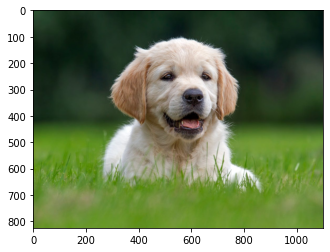

In [ ]:
dog1_int = read_image('/content/doggo.jpg')
dog_list = [dog1_int]
dog1_img = torchvision.transforms.ToPILImage()(dog1_int)
plt.imshow(dog1_img)


Naturally, we can also plot bounding boxes produced by torchvision detection models. Here is a demo with a **Faster R-CNN** model loaded from **fasterrcnn_resnet50_fpn()** model.

In [ ]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights

weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights.transforms()  #To simplify inference, TorchVision bundles the necessary preprocessing transforms into each model weight in this way

images = [transforms(d) for d in dog_list]

model = fasterrcnn_resnet50_fpn(weights=weights, progress=False)  #so, is it a predict method?
model = model.eval()

outputs = model(images)
print(outputs)

[{'boxes': tensor([[227.5154,  93.3063, 866.5179, 676.9257]], grad_fn=<StackBackward0>), 'labels': tensor([18]), 'scores': tensor([0.9957], grad_fn=<IndexBackward0>)}]


Let’s plot the boxes detected by our model. We will only plot the boxes with a score greater than a given **threshold**.



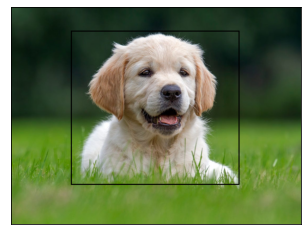

In [ ]:
score_threshold = .8
dogs_with_boxes = [
    draw_bounding_boxes(dog_int, boxes=output['boxes'][output['scores'] > score_threshold], width=4)
    for dog_int, output in zip(dog_list, outputs)
]   #read carefully https://arxiv.org/pdf/1506.01497.pdf
show(dogs_with_boxes)

**torchvision.utils.draw_segmentation_masks(image: Tensor, masks: Tensor, alpha: float = 0.8, colors: Optional[Union[List[Union[str, Tuple[int, int, int]]], str, Tuple[int, int, int]]] = None) → Tensor**

Parameters:

- **image** (Tensor) – Tensor of shape (3, H, W) and dtype uint8.

- **masks** (Tensor) – Tensor of shape (num_masks, H, W) or (H, W) and dtype bool.

- **alpha** (float) – Float number between 0 and 1 denoting the transparency of the masks. 0 means full transparency, 1 means no transparency.

- **colors** (color or list of colors, optional) – List containing the colors of the masks or single color for all masks. The color can be represented as PIL strings e.g. “red” or “#FF00FF”, or as RGB tuples e.g. (240, 10, 157). By default, random colors are generated for each mask.

Returns:
- Image Tensor, with segmentation masks drawn on top.



The draw_segmentation_masks() function can be used to draw segmentation masks on images. Semantic segmentation and instance segmentation models have different outputs. We will see how to use it with torchvision’s **FCN Resnet-50**, loaded with **fcn_resnet50()**, in order to implement instance segmentation. Let’s start by looking at the output of the model. the output of the segmentation model is a tensor of shape (**batch_size**, **num_classes**, **H**, **W**). Each value is a non-normalized score, and we can normalize them into [0, 1] by using a **softmax**. After the softmax, we can interpret each value as a probability indicating how likely a given pixel is to belong to a given class.

Let’s plot the masks that have been detected for the dog class and for the boat class:

torch.Size([1, 21, 825, 1100]) -5.387601375579834 14.358941078186035


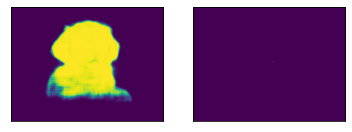

In [ ]:
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights

weights = FCN_ResNet50_Weights.DEFAULT
transforms = weights.transforms(resize_size=None)

model = fcn_resnet50(weights=weights, progress=False)
model = model.eval()

batch = torch.stack([transforms(d) for d in dog_list])
output = model(batch)['out'] #the out key contains all the output tensors
print(output.shape, output.min().item(), output.max().item()) #torch.Size([1, 21, 825, 1100]) indicates that we have 1 batch, 21 possible classes and the image has size 825x1100

sem_class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}

normalized_masks = torch.nn.functional.softmax(output, dim=1)

dog_and_boat_masks = [
    normalized_masks[img_idx, sem_class_to_idx[cls]]
    for img_idx in range(len(dog_list))
    for cls in ('dog', 'boat')
]

show(dog_and_boat_masks)

#Remember: this works because the model was trained by using a dataset containing objects of the classes ['__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
#'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
#'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'] so it detects dogs

### DRAW_KEYPOINTS
This function can be used to draw keypoints on images. The synthax is:
- **torchvision.utils.draw_keypoints(image: Tensor, keypoints: Tensor, connectivity: Optional[List[Tuple[int, int]]] = None, colors: Optional[Union[str, Tuple[int, int, int]]] = None, radius: int = 2, width: int = 3)**

Parameters:
- **image** (Tensor) – Tensor of shape (3, H, W) and dtype uint8.
- **keypoints** (Tensor) – Tensor of shape (num_instances, K, 2) the K keypoints location for each of the N instances, in the format [x, y].
- **connectivity** (List[Tuple[int, int]]]) – A List of tuple where, each tuple contains pair of keypoints to be connected.
- **colors** (str, Tuple) – The color can be represented as PIL strings e.g. “red” or “#FF00FF”, or as RGB tuples e.g. (240, 10, 157).
- **radius** (int) – Integer denoting radius of keypoint.
- **width** (int) – Integer denoting width of line connecting keypoints.

Returns:
**Image Tensor of dtype uint8** with keypoints drawn.



We will see how to use it with torchvision’s **KeypointRCNN** loaded with **keypointrcnn_resnet50_fpn()**. We will first have a look at output of the model.

In [ ]:
from torchvision.models.detection import keypointrcnn_resnet50_fpn, KeypointRCNN_ResNet50_FPN_Weights
from torchvision.io import read_image

person_int = read_image('/content/vucciria.jpg')

weights = KeypointRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights.transforms()

person_float = transforms(person_int)

model = keypointrcnn_resnet50_fpn(weights=weights, progress=False)
model = model.eval()

outputs = model([person_float])
print(outputs)

[{'boxes': tensor([[2.7138e+02, 3.9812e+02, 5.5095e+02, 9.0550e+02],
        [6.7416e+02, 4.1927e+02, 7.1894e+02, 5.1738e+02],
        [3.7382e-01, 4.4404e+02, 4.6448e+01, 5.8888e+02],
        [6.1359e+02, 4.8390e+02, 6.7582e+02, 5.4940e+02],
        [1.7580e+02, 4.7490e+02, 2.1006e+02, 5.3838e+02],
        [1.9212e+02, 4.8566e+02, 2.4400e+02, 5.5423e+02],
        [7.0292e+01, 4.7444e+02, 1.1309e+02, 5.2445e+02],
        [1.4752e+02, 4.6999e+02, 1.8798e+02, 5.2073e+02],
        [3.0693e+02, 0.0000e+00, 4.6435e+02, 1.2289e+02],
        [3.3319e+02, 4.8479e+02, 3.6486e+02, 5.3137e+02],
        [2.3692e+02, 4.8652e+02, 2.8533e+02, 5.6533e+02],
        [3.0789e+02, 4.8833e+02, 3.4549e+02, 5.2995e+02],
        [7.1055e+01, 4.7525e+02, 1.2623e+02, 5.5020e+02],
        [2.3505e+02, 4.2275e+02, 2.7304e+02, 4.8542e+02],
        [1.8376e+02, 4.7400e+02, 2.1011e+02, 5.1021e+02],
        [2.6876e+02, 4.0456e+02, 3.2194e+02, 4.7743e+02],
        [3.0794e+02, 5.0674e+02, 3.4123e+02, 5.3132e+02],
   

As we see the output contains a list of dictionaries. The output list is of length **batch_size**. We currently have just a single image so length of list is 1. Each entry in the list corresponds to an input image, and it is a **dict with keys boxes, labels, scores, keypoints and keypoint_scores**. Each value associated to those keys has **num_instances** elements in it.

In [ ]:
kpts = outputs[0]['keypoints']
scores = outputs[0]['scores']

print(kpts)
print(scores)

tensor([[[4.2696e+02, 4.6382e+02, 1.0000e+00],
         [4.4515e+02, 4.5231e+02, 1.0000e+00],
         [4.0973e+02, 4.5135e+02, 1.0000e+00],
         ...,
         [3.2739e+02, 9.0406e+02, 1.0000e+00],
         [4.8153e+02, 9.0406e+02, 1.0000e+00],
         [3.1111e+02, 9.0406e+02, 1.0000e+00]],

        [[6.9274e+02, 4.3213e+02, 1.0000e+00],
         [6.9369e+02, 4.2927e+02, 1.0000e+00],
         [6.9369e+02, 4.2832e+02, 1.0000e+00],
         ...,
         [7.0417e+02, 5.1690e+02, 1.0000e+00],
         [6.9369e+02, 5.1690e+02, 1.0000e+00],
         [7.0512e+02, 5.1690e+02, 1.0000e+00]],

        [[8.5376e-01, 4.6274e+02, 1.0000e+00],
         [8.5376e-01, 4.5890e+02, 1.0000e+00],
         [8.5376e-01, 4.5890e+02, 1.0000e+00],
         ...,
         [1.7172e+01, 5.8840e+02, 1.0000e+00],
         [8.5376e-01, 5.8840e+02, 1.0000e+00],
         [1.7172e+01, 5.8840e+02, 1.0000e+00]],

        ...,

        [[1.8721e+02, 4.8540e+02, 1.0000e+00],
         [1.9002e+02, 4.8446e+02, 1.0000e+00]

The KeypointRCNN model detects there are two instances in the image. If you plot the boxes by using draw_bounding_boxes() you would recognize they are the person and the surfboard. If we look at the scores, we will realize that the model is much more confident about the person than surfboard. We could now set a threshold confidence and plot instances which we are confident enough. Let us set a threshold of 0.75 and filter out the keypoints corresponding to the person.

In [ ]:
detect_threshold = 0.75
idx = torch.where(scores > detect_threshold)  # 'where' is a filter
keypoints = kpts[idx]

print(keypoints)

tensor([[[4.2696e+02, 4.6382e+02, 1.0000e+00],
         [4.4515e+02, 4.5231e+02, 1.0000e+00],
         [4.0973e+02, 4.5135e+02, 1.0000e+00],
         [4.6526e+02, 4.7628e+02, 1.0000e+00],
         [3.8483e+02, 4.8012e+02, 1.0000e+00],
         [5.1121e+02, 5.8179e+02, 1.0000e+00],
         [3.3122e+02, 5.7891e+02, 1.0000e+00],
         [5.2941e+02, 7.2470e+02, 1.0000e+00],
         [2.9866e+02, 7.2470e+02, 1.0000e+00],
         [5.0547e+02, 8.5419e+02, 1.0000e+00],
         [3.0920e+02, 8.4268e+02, 1.0000e+00],
         [4.7579e+02, 8.6953e+02, 1.0000e+00],
         [3.5420e+02, 8.6090e+02, 1.0000e+00],
         [4.7483e+02, 9.0406e+02, 1.0000e+00],
         [3.2739e+02, 9.0406e+02, 1.0000e+00],
         [4.8153e+02, 9.0406e+02, 1.0000e+00],
         [3.1111e+02, 9.0406e+02, 1.0000e+00]],

        [[6.9274e+02, 4.3213e+02, 1.0000e+00],
         [6.9369e+02, 4.2927e+02, 1.0000e+00],
         [6.9369e+02, 4.2832e+02, 1.0000e+00],
         [6.9655e+02, 4.3023e+02, 1.0000e+00],
         [7

Great, now we have the keypoints corresponding to the person. Each keypoint is represented by x, y coordinates and the visibility (**honestly I don't know what is the "visibility"**). We can now use the draw_keypoints() function to draw keypoints. Note that the utility expects uint8 images.

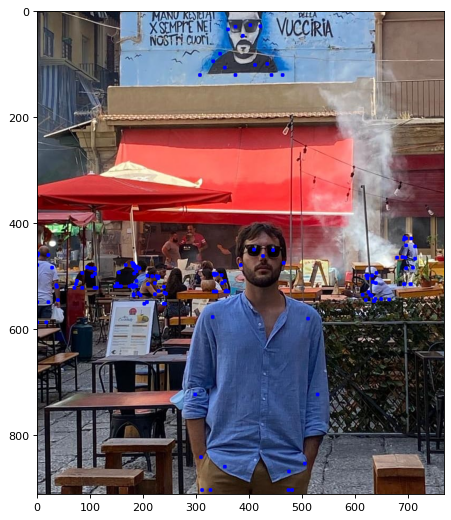

In [ ]:
from torchvision.utils import draw_keypoints

res = draw_keypoints(person_int, keypoints, colors="blue", radius=3)  #keep attention: I put person_int and not person_float
                                                                      #remember: keypoints (FloatTensor[N, K, 3]): the K keypoints location for each of the N instances, in the format [x, y, visibility]
res_img = torchvision.transforms.ToPILImage()(res)
plt.figure(figsize=(8, 8), dpi=80)
plt.imshow(res_img)
#show(res)

In [ ]:
print(type(res))

<class 'torch.Tensor'>


### FLOW_TO_IMAGE
An important task in computer vision is the *optical flow* one: basically it consists in predicting movement between two images, usually two consecutive frames of a video. Optical flow models take two images as input, and predict a flow: the flow indicates the displacement of every single pixel in the first image, and maps it to its corresponding pixel in the second image. Flows are (2, H, W)-dimensional tensors, where the first axis corresponds to the predicted horizontal and vertical displacements.

In this context one could use the *flow_to_image* method:

torchvision.utils.flow_to_image(flow: Tensor) → Tensor

This method converts a flow to an RGB image.

The parameters are:
- flow (Tensor) – Flow of shape (N, 2, H, W) or (2, H, W) and dtype torch.float.

It returns:
- Image Tensor of dtype uint8 where each color corresponds
to a given flow direction. Shape is (N, 3, H, W) or (3, H, W) depending on the input.

Now let's see an example taken by https://pytorch.org/vision/stable/auto_examples/plot_optical_flow.html#sphx-glr-auto-examples-plot-optical-flow-py.

/usr/local/lib/python3.7/dist-packages/torchvision/io/video.py:162: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


shape = torch.Size([2, 3, 520, 960]), dtype = torch.float32
type = <class 'list'>
length = 12 = number of iterations of the model
dtype = torch.float32
shape = torch.Size([2, 2, 520, 960]) = (N, 2, H, W)
min = -3.8997080326080322, max = 6.400369644165039


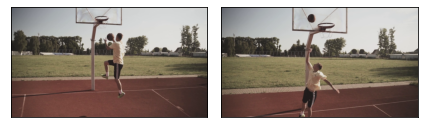

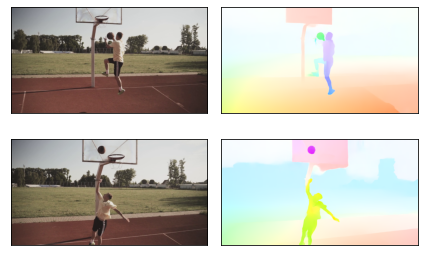

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = "tight"
# sphinx_gallery_thumbnail_number = 2


def plot(imgs, **imshow_kwargs):
    if not isinstance(imgs[0], list):  #isistance= True if the first argument type is equal the second argument
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0])
    _, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            img = F.to_pil_image(img.to("cpu"))
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    plt.tight_layout()

###################################
# Reading Videos Using Torchvision
# --------------------------------
# We will first read a video using :func:`~torchvision.io.read_video`.
# Alternatively one can use the new :class:`~torchvision.io.VideoReader` API (if
# torchvision is built from source).
# The video we will use here is free of use from `pexels.com
# <https://www.pexels.com/video/a-man-playing-a-game-of-basketball-5192157/>`_,
# credits go to `Pavel Danilyuk <https://www.pexels.com/@pavel-danilyuk>`_.


import tempfile
from pathlib import Path
from urllib.request import urlretrieve


video_url = "https://download.pytorch.org/tutorial/pexelscom_pavel_danilyuk_basketball_hd.mp4"
video_path = Path(tempfile.mkdtemp()) / "basketball.mp4"  #tempfile.mkdtemp(): Creates a temporary directory in the most secure manner possible.
_ = urlretrieve(video_url, video_path)

#########################
# :func:`~torchvision.io.read_video` returns the video frames, audio frames and
# the metadata associated with the video. In our case, we only need the video
# frames.
#
# Here we will just make 2 predictions between 2 pre-selected pairs of frames,
# namely frames (100, 101) and (150, 151). Each of these pairs corresponds to a
# single model input.

from torchvision.io import read_video
frames, _, _ = read_video(str(video_path), output_format="TCHW")

img1_batch = torch.stack([frames[100], frames[150]])
img2_batch = torch.stack([frames[101], frames[151]])

plot(img1_batch)

#########################
# The RAFT model accepts RGB images. We first get the frames from
# :func:`~torchvision.io.read_video` and resize them to ensure their
# dimensions are divisible by 8. Then we use the transforms bundled into the
# weights in order to preprocess the input and rescale its values to the
# required ``[-1, 1]`` interval.

from torchvision.models.optical_flow import Raft_Large_Weights

weights = Raft_Large_Weights.DEFAULT
transforms = weights.transforms()


def preprocess(img1_batch, img2_batch):
    img1_batch = F.resize(img1_batch, size=[520, 960])
    img2_batch = F.resize(img2_batch, size=[520, 960])
    return transforms(img1_batch, img2_batch)


img1_batch, img2_batch = preprocess(img1_batch, img2_batch)

print(f"shape = {img1_batch.shape}, dtype = {img1_batch.dtype}")


####################################
# Estimating Optical flow using RAFT
# ----------------------------------
# We will use our RAFT implementation from
# :func:`~torchvision.models.optical_flow.raft_large`, which follows the same
# architecture as the one described in the `original paper <https://arxiv.org/abs/2003.12039>`_.
# We also provide the :func:`~torchvision.models.optical_flow.raft_small` model
# builder, which is smaller and faster to run, sacrificing a bit of accuracy.

from torchvision.models.optical_flow import raft_large

# If you can, run this example on a GPU, it will be a lot faster.
device = "cuda" if torch.cuda.is_available() else "cpu"

model = raft_large(weights=Raft_Large_Weights.DEFAULT, progress=False).to(device)
model = model.eval()

list_of_flows = model(img1_batch.to(device), img2_batch.to(device))
print(f"type = {type(list_of_flows)}")
print(f"length = {len(list_of_flows)} = number of iterations of the model")

####################################
# The RAFT model outputs lists of predicted flows where each entry is a
# (N, 2, H, W) batch of predicted flows that corresponds to a given "iteration"
# in the model. For more details on the iterative nature of the model, please
# refer to the `original paper <https://arxiv.org/abs/2003.12039>`_. Here, we
# are only interested in the final predicted flows (they are the most acccurate
# ones), so we will just retrieve the last item in the list.
#
# As described above, a flow is a tensor with dimensions (2, H, W) (or (N, 2, H,
# W) for batches of flows) where each entry corresponds to the horizontal and
# vertical displacement of each pixel from the first image to the second image.
# Note that the predicted flows are in "pixel" unit, they are not normalized
# w.r.t. the dimensions of the images.
predicted_flows = list_of_flows[-1]
print(f"dtype = {predicted_flows.dtype}")
print(f"shape = {predicted_flows.shape} = (N, 2, H, W)")
print(f"min = {predicted_flows.min()}, max = {predicted_flows.max()}")


####################################
# Visualizing predicted flows
# ---------------------------
# Torchvision provides the :func:`~torchvision.utils.flow_to_image` utlity to
# convert a flow into an RGB image. It also supports batches of flows.
# each "direction" in the flow will be mapped to a given RGB color. In the
# images below, pixels with similar colors are assumed by the model to be moving
# in similar directions. The model is properly able to predict the movement of
# the ball and the player. Note in particular the different predicted direction
# of the ball in the first image (going to the left) and in the second image
# (going up).

from torchvision.utils import flow_to_image

flow_imgs = flow_to_image(predicted_flows)

# The images have been mapped into [-1, 1] but for plotting we want them in [0, 1]
img1_batch = [(img1 + 1) / 2 for img1 in img1_batch]

grid = [[img1, flow_img] for (img1, flow_img) in zip(img1_batch, flow_imgs)]
plot(grid)

####################################
# Bonus: Creating GIFs of predicted flows
# ---------------------------------------
# In the example above we have only shown the predicted flows of 2 pairs of
# frames. A fun way to apply the Optical Flow models is to run the model on an
# entire video, and create a new video from all the predicted flows. Below is a
# snippet that can get you started with this. We comment out the code, because
# this example is being rendered on a machine without a GPU, and it would take
# too long to run it.

# from torchvision.io import write_jpeg
# for i, (img1, img2) in enumerate(zip(frames, frames[1:])):
#     # Note: it would be faster to predict batches of flows instead of individual flows
#     img1, img2 = preprocess(img1, img2)

#     list_of_flows = model(img1.to(device), img2.to(device))
#     predicted_flow = list_of_flows[-1][0]
#     flow_img = flow_to_image(predicted_flow).to("cpu")
#     output_folder = "/tmp/"  # Update this to the folder of your choice
#     write_jpeg(flow_img, output_folder + f"predicted_flow_{i}.jpg")

####################################
# Once the .jpg flow images are saved, you can convert them into a video or a
# GIF using ffmpeg with e.g.:
#
# ffmpeg -f image2 -framerate 30 -i predicted_flow_%d.jpg -loop -1 flow.gif

### MAKE_GRID
This method simply creates a grid where you can put different images.

torchvision.utils.make_grid(tensor: Union[Tensor, List[Tensor]], nrow: int = 8, padding: int = 2, normalize: bool = False, value_range: Optional[Tuple[int, int]] = None, scale_each: bool = False, pad_value: float = 0.0, **kwargs) → Tensor

Parameters:
- tensor (Tensor or list) – 4D mini-batch Tensor of shape (B x C x H x W) or a list of images all of the same size.

- nrow (int, optional) – Number of images displayed in each row of the grid. The final grid size is (B / nrow, nrow). Default: 8.

- padding (int, optional) – amount of padding. Default: 2.

- normalize (bool, optional) – If True, shift the image to the range (0, 1), by the min and max values specified by value_range. Default: False.

- value_range (tuple, optional) – tuple (min, max) where min and max are numbers, then these numbers are used to normalize the image. By default, min and max are computed from the tensor.

- scale_each (bool, optional) – If True, scale each image in the batch of images separately rather than the (min, max) over all images. Default: False.

- pad_value (float, optional) – Value for the padded pixels. Default: 0.

It returns:

- the tensor containing grid of images.

In [ ]:
print(type(dog1_int))

<class 'torch.Tensor'>


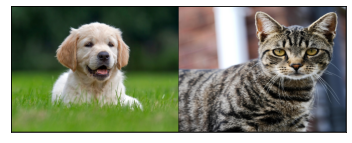

In [ ]:
from numpy.ma.core import size
from torchvision.utils import make_grid
from torch import Tensor

img = read_image('/content/cat.jpg')
img = torchvision.transforms.Resize((825,1100))(img)
images = [dog1_int, img]
grid = make_grid(images, nrow = 2, scale_each = True)
show(grid)

### SAVE_IMAGE
Save a given Tensor into an image file.

torchvision.utils.save_image(tensor: Union[Tensor, List[Tensor]], fp: Union[str, Path, BinaryIO], format: Optional[str] = None, **kwargs) → None

Parameters:
- tensor (Tensor or list) – Image to be saved. If given a mini-batch tensor, saves the tensor as a grid of images by calling make_grid.

- fp (string or file object) – A filename or a file object

- format (Optional) – If omitted, the format to use is determined from the filename extension. If a file object was used instead of a filename, this parameter should always be used.

- **kwargs – Other arguments are documented in make_grid.